<a href="https://colab.research.google.com/github/mukkatharun/Kmeans_ML_Assignment/blob/main/Kmeans_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [42]:
df = pd.read_csv('brazil_data.csv', index_col=0)
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


In [43]:
df.shape

(9239, 17)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9238
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       9239 non-null   object 
 1   track_name        9239 non-null   object 
 2   track_id          9239 non-null   object 
 3   popularity        9239 non-null   int64  
 4   danceability      9239 non-null   float64
 5   energy            9239 non-null   float64
 6   key               9239 non-null   int64  
 7   loudness          9239 non-null   float64
 8   mode              9239 non-null   int64  
 9   speechiness       9239 non-null   float64
 10  acousticness      9239 non-null   float64
 11  instrumentalness  9239 non-null   float64
 12  liveness          9239 non-null   float64
 13  valence           9239 non-null   float64
 14  tempo             9239 non-null   float64
 15  duration_ms       9239 non-null   int64  
 16  time_signature    9239 non-null   int64  


In [45]:
df.isnull().count() # no null values

artist_name         9239
track_name          9239
track_id            9239
popularity          9239
danceability        9239
energy              9239
key                 9239
loudness            9239
mode                9239
speechiness         9239
acousticness        9239
instrumentalness    9239
liveness            9239
valence             9239
tempo               9239
duration_ms         9239
time_signature      9239
dtype: int64

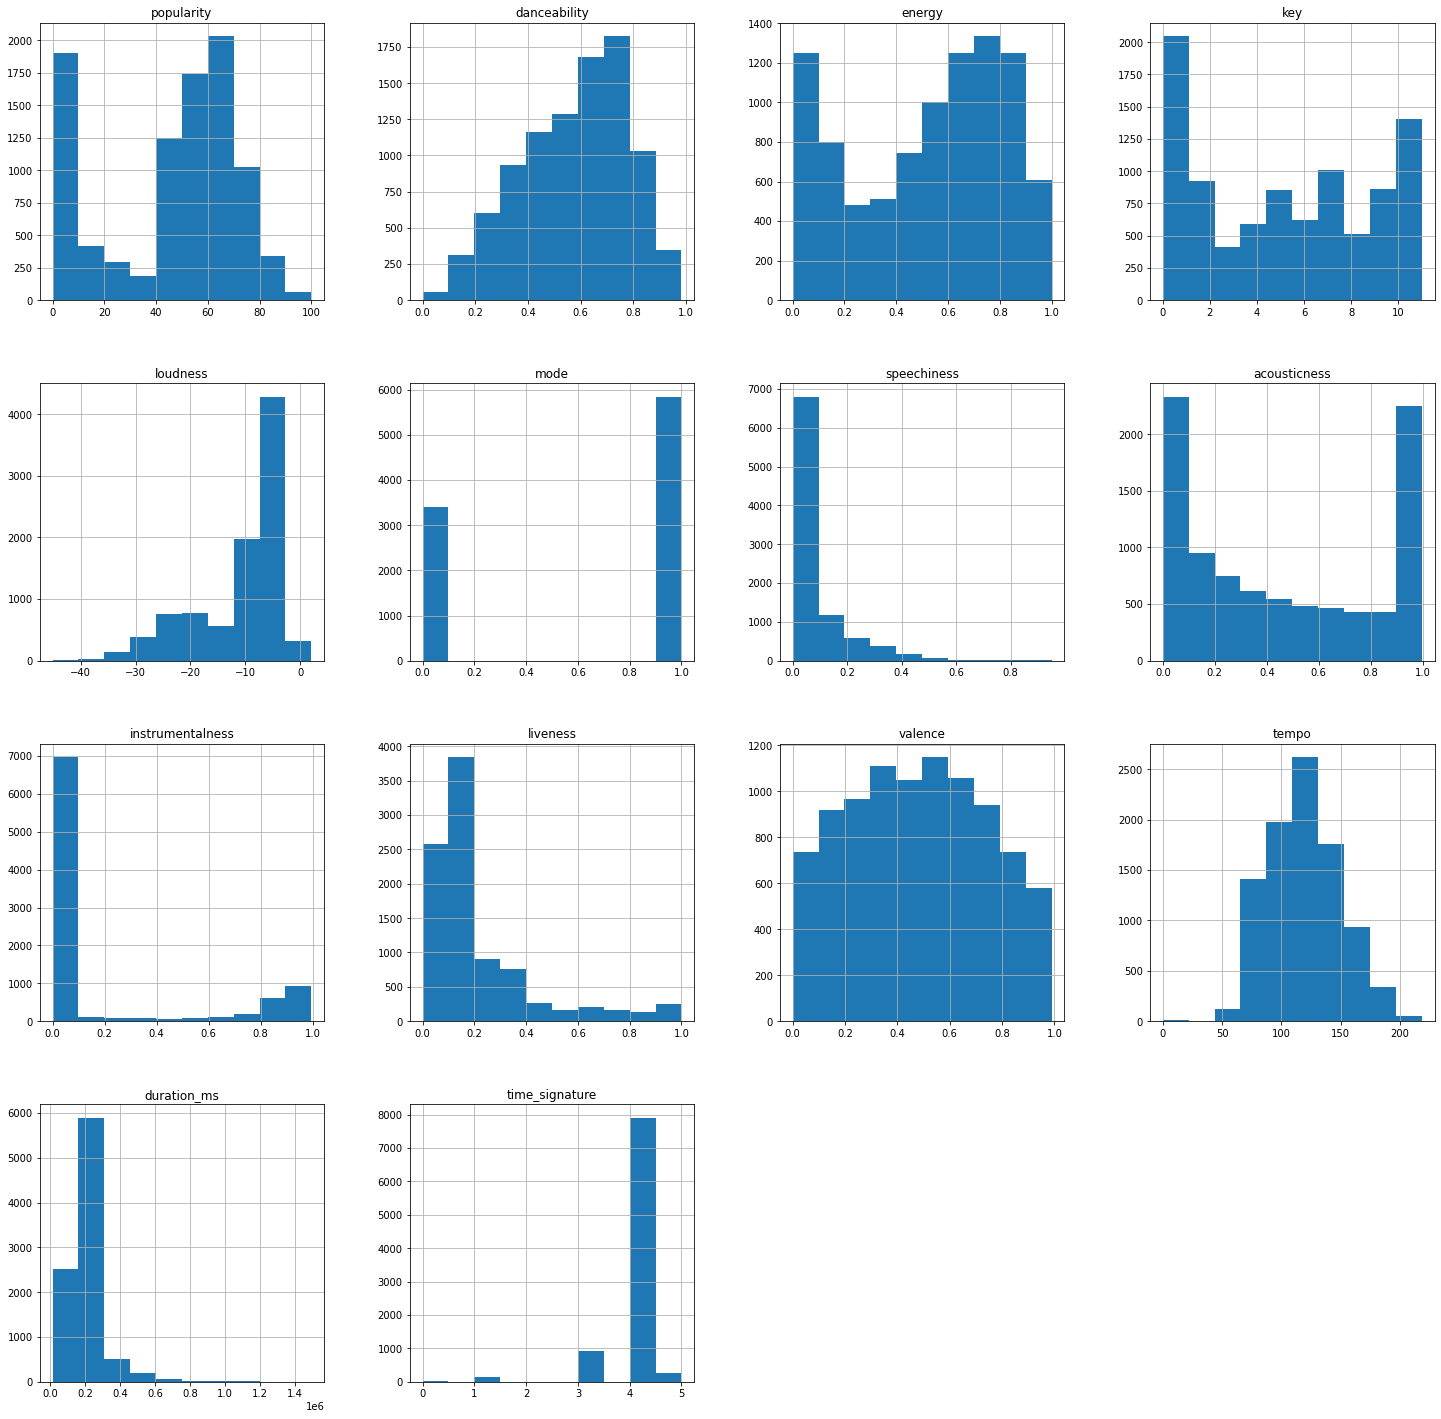

In [46]:
# plotting histograms
df.hist(figsize=(25,25));

In [47]:
# unique values
df.nunique().sort_values()

mode                   2
time_signature         5
key                   12
popularity           101
danceability         906
speechiness         1199
valence             1299
liveness            1391
energy              1656
acousticness        2183
instrumentalness    2544
artist_name         2660
loudness            7148
tempo               8127
duration_ms         8434
track_name          9018
track_id            9239
dtype: int64

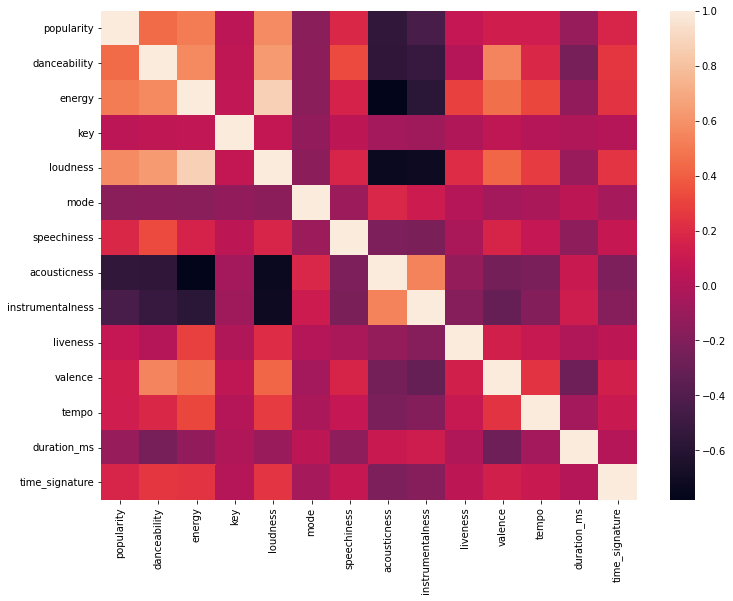

In [48]:
# calculate the correlation matrix
corr = df.corr()
f, ax = plt.subplots(figsize=(12,9))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [49]:
# Filtering out the categorical columns
df_cluster = df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values

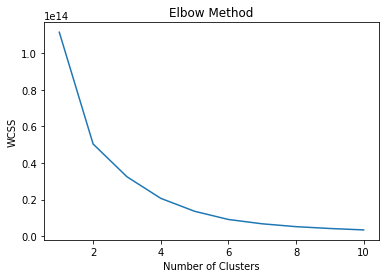

In [50]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(df_cluster)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

We could see after 5 clusters, the drop is very minimum. so we will go with 5 clusters

In [51]:
scaler = MinMaxScaler()

In [52]:
df_scaled = scaler.fit_transform(df_cluster)

**K Means**

In [53]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_scaled)

In [54]:
y_kmeans[10:20]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [55]:
set(y_kmeans)

{0, 1, 2, 3, 4}

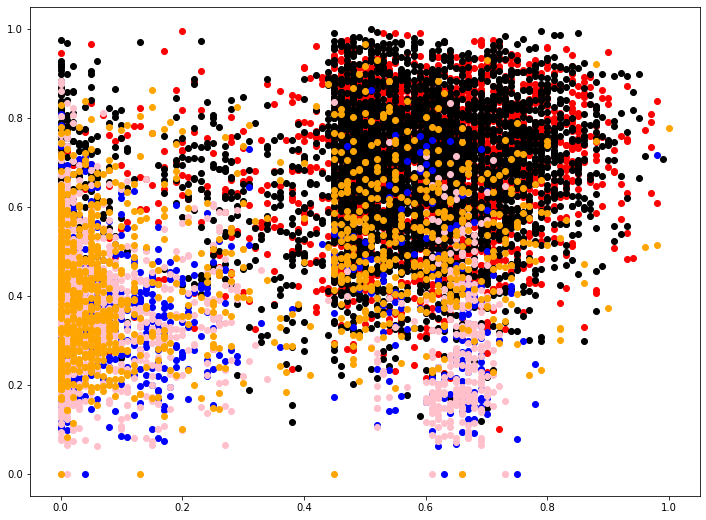

In [56]:
f, ax = plt.subplots(figsize=(12,9))

#filter rows of original data
filtered_label1 = df_scaled[y_kmeans == 0]
filtered_label2 = df_scaled[y_kmeans == 1]
filtered_label3 = df_scaled[y_kmeans == 2]
filtered_label4 = df_scaled[y_kmeans == 3]
filtered_label5 = df_scaled[y_kmeans == 4]
#Plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'blue')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'pink')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'orange')
plt.show()

In [57]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(9239, 1)


,k_cluster
0,0
1,1
2,0
3,0
4,1


In [58]:
# concatenating the cluster column to the dataframe
df = pd.concat([df, kmeans], axis=1)

# checking the dataframe
print(df.shape)
df.head()

(9239, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,0
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,1
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,0
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,0
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,1


In [63]:
# checking the songs in a particular cluster
df.loc[df['k_cluster'] == 1][:10]


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.9590,0.658,131.573,147748,4,1
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.3330,0.714,152.370,181930,4,1
6,Lexa,Chama Ela (feat. Pedro Sampaio),14kRWkCWBYfQqILflEcpSJ,84,0.888,0.841,6,-1.933,1,0.1470,0.4600,0.000091,0.0568,0.964,149.994,120200,4,1
8,Anitta,Combatchy (feat. MC Rebecca),2bPtwnrpFNEe8N7Q85kLHw,83,0.826,0.730,1,-3.032,1,0.0809,0.3830,0.000374,0.0197,0.605,150.134,157600,4,1
9,Zé Neto & Cristiano,Ferida Curada,1U3tv41tFRgOfbytpuYQrR,83,0.490,0.845,2,-3.359,1,0.0973,0.4900,0.000000,0.2130,0.548,146.105,159164,4,1
10,Ludmilla,Invocada (Participação especial de Léo Santana...,4k20Ie47EcWtS4wMBn8w8S,83,0.776,0.864,1,-4.281,1,0.0517,0.4780,0.000000,0.9320,0.701,134.992,157494,4,1
13,Pk,Quando a vontade bater (Participação especial ...,26WpOBpHiIMoBuMEIwtOCH,83,0.621,0.700,8,-5.502,1,0.2470,0.5390,0.000000,0.1520,0.704,149.902,166400,4,1
14,Matuê,Kenny G,3MkdA6vwF0ifRl86yzTlJW,82,0.417,0.767,9,-3.310,1,0.1940,0.0778,0.000000,0.1130,0.152,72.573,189600,3,1
15,MC JottaPê,Sentou e Gostou,6V43u5SCjkfMpxMAXRPifr,82,0.702,0.672,7,-3.308,1,0.3970,0.2610,0.000988,0.0916,0.722,131.453,163253,4,1
16,Luan Santana,quando a bad bater - ao vivo,1nVIlX3h3Ds9bH6JMQopIU,82,0.647,0.787,1,-4.767,1,0.0413,0.3070,0.000000,0.5320,0.535,128.121,179722,4,1
